In [1]:
import torch
from IPython.display import Image  # for displaying images
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
%matplotlib inline

random.seed(108)

In [2]:
!git clone https://github.com/ultralytics/yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 15829, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 15829 (delta 21), reused 26 (delta 5), pack-reused 15769
Receiving objects: 100% (15829/15829), 14.59 MiB | 25.76 MiB/s, done.
Resolving deltas: 100% (10835/10835), done.


In [3]:
!pip install -r yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.0/608.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!python3 /content/yolov5/train.py --img 540 --batch 16 --epochs 50 --data '/content/custom_datasett.yaml' --weights yolov5s.pt --cache

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=yolov5s.pt, cfg=, data=/content/custom_datasett.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=540, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothin

In [10]:
!python /content/yolov5/detect.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 540 --conf 0.1 --source '/content/drive/MyDrive/Dataset for YOLO V5/test/images'

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/Dataset for YOLO V5/test/images, data=yolov5/data/coco128.yaml, imgsz=[540, 540], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide

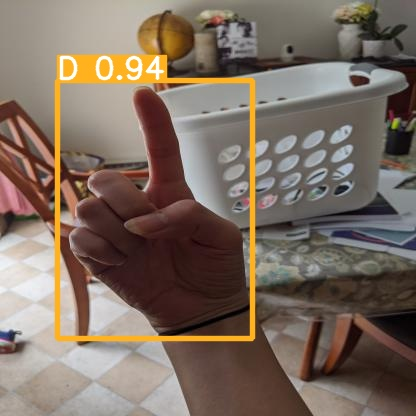

In [14]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/D1_jpg.rf.89a5f6f41bf8bc795db94105f709dd34.jpg'):
    display(Image(filename=imageName))
    print("\n")


In [20]:
!python /content/yolov5/detect.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 540 --conf 0.1 --source '/content/hatsApp Image 2023-07-27 at 04.46.46.jpg'

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/hatsApp Image 2023-07-27 at 04.46.46.jpg, data=yolov5/data/coco128.yaml, imgsz=[540, 540], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labe

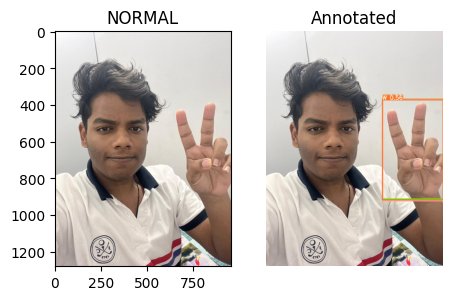

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

NORMAL = mpimg.imread('/content/hatsApp Image 2023-07-27 at 04.46.46.jpg')
Annotated = mpimg.imread('/content/yolov5/runs/detect/exp3/hatsApp Image 2023-07-27 at 04.46.46.jpg')



fig, axs = plt.subplots(1, 2, figsize=(5, 5))

axs[0].imshow(NORMAL)
axs[0].set_title('NORMAL')

axs[1].imshow(Annotated)
axs[1].set_title('Annotated')
plt.axis('off')
plt.show()

In [24]:
!python /content/yolov5/detect.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 540 --conf 0.1 --source '/content/hardik.jpg'

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/hardik.jpg, data=yolov5/data/coco128.yaml, imgsz=[540, 540], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, hal

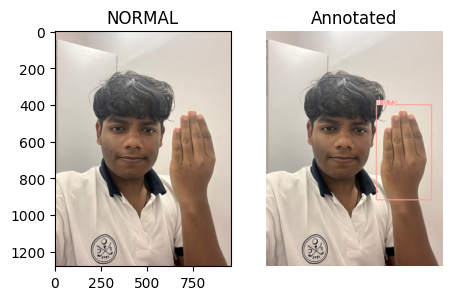

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

NORMAL = mpimg.imread('/content/hardik.jpg')
Annotated = mpimg.imread('/content/yolov5/runs/detect/exp4/hardik.jpg')



fig, axs = plt.subplots(1, 2, figsize=(5, 5))

axs[0].imshow(NORMAL)
axs[0].set_title('NORMAL')

axs[1].imshow(Annotated)
axs[1].set_title('Annotated')
plt.axis('off')
plt.show()